# 2.2 Back Transform in polar coordinates

In [7]:
import numpy as np
import matplotlib.pyplot as plt

### Unterpunkt a: Berechnen der F.T. Projektion
Disclaimer: Ich verwende hier die numpy FFT, weil auch für die Reverse FFT die 

numpy funktion verwendet werden soll, sonst ist alles aus Aufgabe 1


In [8]:
# data importieren
data = np.loadtxt('Data/projection.txt', delimiter=',')
p_phi = data
Nphi = data.shape[0] 
Nxi= data.shape[1]

#Intervallle
phi_interval = np.linspace(0, np.pi, Nphi, endpoint=False)  # 0 <= φ < π
ksi_interval = np.linspace(-Nxi/2, Nxi/2, Nxi)
delta_ksi = ksi_interval[1] - ksi_interval[0]

#FFT mit numpy, über die xi Achse, also halt Zeilenweise
freq = np.fft.fftshift(np.fft.fftfreq(Nxi, d=delta_ksi))   #Note to self: fftshift macht 0 in Mitte, fftfreq macht Frequenzachse damit korrekt skaliert
kxi = 2*np.pi * freq 
F_phi = np.fft.fftshift( np.fft.fft(p_phi, axis=1), axes=1 ) * delta_ksi 
print( F_phi.shape)


(180, 512)


### Unterpunkt b: range of $k_{\xi}$

Um hier den Intervall zu finden verwenden wir Formel bzw Intervall 2.42 aus dem Skript:

#### $\nu_{ny}=\frac{n}{2P}$

wobei n die Abtastpunkte (Spaltenzahl der Projektionsdata) und P die Länge des Messbereichs (Länge ds Intervall von $\xi$)

nun kann man mit k=2pi$\nu$ das gewünschte intervall berechneen, mit hilfe der Niquist Frequenz.

somit folgt 

#### $k_{max}=\frac{\pi n}{\xi_{max}-\xi_{min}}$ und $k_{min}=-\frac{\pi n}{\xi_{max}-\xi_{min}}$

### Unterpunkt c: Modified Projection



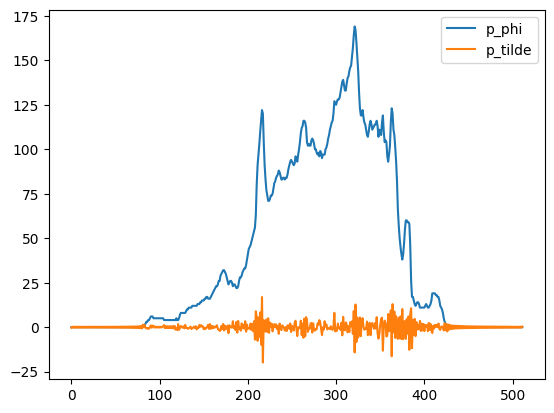

In [9]:
#Mod. Projektion ist die Rücktransformierte FFT * betrag kxi
F_k_mod = np.abs(kxi)[None, :] * F_phi
p_tilde = np.fft.ifft(F_k_mod, axis=1).real

#kurzer Plot als test und sanity chekc lol
plt.plot(p_phi[0], label="p_phi")
plt.plot(p_tilde[0], label="p_tilde")
plt.legend()
#ok schaut schon mal ned schlecht aus, macht auf jeden fall was es soll xD